## Лабораторная работа 1. Знакомство с библиотеками для анализа данных

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### О задании

Лабораторная работа №1 направлена на работу с пакетами NumPy, Pandas и Matplotlib путём решения набора задач. В данном задании разрешено пользоваться только стандартной библиотекой языка Python, а также пакетами NumPy, Pandas и Matplotlib. Целью задания является редактирование данного ipython notebook-a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в задании функции.

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.
Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

###  Правила сдачи

Описаны на странице курса.

### (5 баллов) Знакомство с Numpy

Во всех заданиях данного раздела запрещено использовать циклы. Под матрицей в данных заданиях понимается двумерный numpy.array.

In [1]:
import numpy as np

**1. (0.5 балла)** Реализуйте функцию, принимающую на вход матрицу X и два массива i и j одинаковой длины и возвращающую вектор np.array, состоящий из последовательности элементов [X[i[0], j[0]], X[i[1], j[1]], ..., X[i[N-1], j[N-1]]].

In [2]:
def construct_array(X, i, j):
    return X[i, j]

**2. (0.5 балла)** Написать функцию для подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы.
Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответом является 3. Если ненулевых элементов нет, функция должна возвращать None.

In [3]:
def nonzero_product(X):
    diag = X.diagonal()
    diag = diag[np.nonzero(diag)]
    return np.prod(diag) if len(diag) else None
# вместо len(diag) можно использовать np.count_nonzero(diag)

**3. (0.5 балла)** Написать функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [4]:
def max_element(arr):
    ind = np.where(arr[:-1] == 0)[0]
    return np.max(arr[ind + 1]) if len(ind) else None

**4. (0.5 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [5]:
def nearest_value(X, v):
    return X.item(np.argmin(np.abs(X - v)))

**5. (1 балл)** Написать функцию, которая получает на вход матрицу и масштабирует каждый её столбец, а именно вычитает из столбца его среднее значение и делит столбец на стандартное отклонение. Для тестирования можно сгенерировать с помощью метода numpy.random.randint случайную матрицу и проверить на ней работу метода.  Убедитесь, что в функции не будет происходить деления на ноль. 

In [6]:
def scale(X):
    def scale_func1D(X):
        X = X - np.mean(X)
        sd = np.std(X)
        return X/sd if (sd != 0) else X
    
    return np.apply_along_axis(scale_func1D, axis=0, arr=X)

**6. (1 балл)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $N$(10,1)

In [7]:
def get_stats(X):
    X = np.matrix(X)
    return {'det': np.linalg.det(X),
            'trace': np.trace(X),
            'min': np.min(X),
            'max': np.max(X),
            'frobNorm': np.sqrt(np.trace(X * X.getH())),
            'eigvals': np.linalg.eigvals(X),
            'inv': np.linalg.inv(X)}

**7. (1 балл)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль? (Данную задачу можно решать используя цикл для повторения эксперимента) 

In [8]:
def rndMatrix(m=10, n=10, var=1, mean=0):
    return np.matrix(np.sqrt(var)*np.random.randn(m, n) + mean)

x = [np.max(rndMatrix()*rndMatrix()) for x in range(0, 100)]

print "mean of maximum =", np.mean(x)
print "95 percentile =", np.percentile(x, q=95)

mean of maximum = 8.22381492757
95 percentile = 11.1855308611


In [9]:
var = 160
mean = 4
mx = [np.max(rndMatrix(m=100, n=1, var=var, mean=mean)) for x in range(0, 100)]

print "mean of maximum =", np.mean(mx)
print "mean of maximum =", np.std(mx)
print "95 percentile =", np.percentile(mx, q=95)
# rndMatrix(m=100, n=1, sd=10, mean=0)
3*np.sqrt(200)

mean of maximum = 36.4239966967
mean of maximum = 5.64090098571
95 percentile = 45.5203583903


42.426406871192853

### (3 балла) Pandas 

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

Загрузите данные о пассажирах Титаника из файла *titanic.csv* и ответьте на следующие вопросы:

**1. (1 балл)** Опишите данный датасет: какое расределение женщин/мужчин в нем? Сколько пассажиров ехало каким классом? Какой средний/минимальный/максимальный возраст пассажиров? Что можно сказать о количестве выживших пассажиров?

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
dt = pd.read_csv('titanic.csv')

In [13]:
print "percentage of men in the ship:", np.mean(dt.Sex == 'male')
print "percentage of women in the ship:", np.mean(dt.Sex == 'female')

percentage of men in the ship: 0.64758698092
percentage of women in the ship: 0.35241301908


##### Сколько пассажиров ехало каким классом

Первым классом ехало 216 человек. Средний возраст 38 лет. 

Вторым классом ехало 184 человек. Средний возраст 30 лет. 

Третьим классом ехало 491 человек. Средний возраст 25 лет.

Минимальный и максимальный возраст по каждому классу можно посмотреть ниже

In [14]:
dt.drop(['Parch', 'SibSp'], axis=1).groupby('Pclass').describe(percentiles=[])

Age        Fare  PassengerId    Survived
Pclass                                                       
1      count  186.000000  216.000000   216.000000  216.000000
       mean    38.233441   84.154687   461.597222    0.629630
       std     14.802856   78.380373   246.737616    0.484026
       min      0.920000    0.000000     2.000000    0.000000
       50%     37.000000   60.287500   472.000000    1.000000
       max     80.000000  512.329200   890.000000    1.000000
2      count  173.000000  184.000000   184.000000  184.000000
       mean    29.877630   20.662183   445.956522    0.472826
       std     14.001077   13.417399   250.852161    0.500623
       min      0.670000    0.000000    10.000000    0.000000
       50%     29.000000   14.250000   435.500000    0.000000
       max     70.000000   73.500000   887.000000    1.000000
3      count  355.000000  491.000000   491.000000  491.000000
       mean    25.140620   13.675550   439.154786    0.242363
       std     12.495398   11.778142   264.441453    0.428949
       min      0.420000    0.000000     1.000000    0.000000
       50%     24.000000    8.050000   432.000000    0.000000
       max     74.000000   69.550000   891.000000    1.000000

##### Какой средний/минимальный/максимальный возраст пассажиров

mean      29 с половиной лет
min        5 месяцев.
max       80 лет

In [15]:
dt.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

##### Что можно сказать о количестве выживших пассажиров?
Они были. Более трети людей выжило, как минимум 342 человека

In [16]:
print mean(dt.Survived), sum(dt.Survived)

0.383838383838 342


**2. (1 балл)** Верно ли, что женщины выживали чаще мужчин? Какие пассажиры выживали чаще: с более дешевыми или дорогими билетами? Верно ли, что чаще выживали более молодые пассажиры?

##### Верно ли, что женщины выживали чаще мужчин?
Да, верно. Выжило менее 20% мужчин. И более 70% женщин 

In [17]:
dt.groupby('Sex').Survived.apply(mean)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

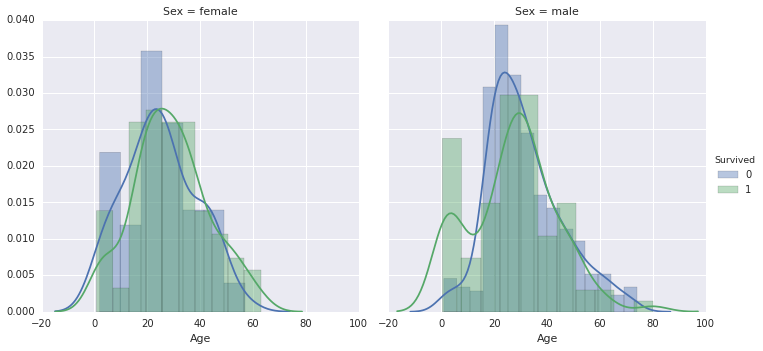

In [18]:
g = sns.FacetGrid(dt, col='Sex', hue='Survived', size=5);
g.map(sns.distplot, 'Age');
g.add_legend()

##### Какие пассажиры выживали чаще: с более дешевыми или дорогими билетами?
Женщины отдавшие за билет более 50 выжили практически все. Для мужчин цена билета никак не влияла на выживаемость.

/home/dezzan/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


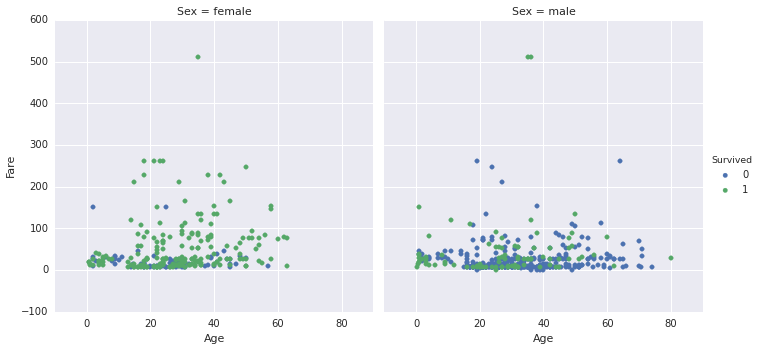

In [19]:
g = sns.FacetGrid(dt, col='Sex', hue='Survived', size=5);
g.map(plt.scatter, 'Age', 'Fare');
g.add_legend()

**3. (1 балл)** Найдите все признаки, для которых есть пропуски в данных. Обычно алгоритмы по умолчанию не умеют обрабатывать такие данные. Предложите способы обработки данных с пропусками (не менее двух) и укажите их достоинства/недостаки каждого. Проиллюстрируйте их на примере данного датасета.

In [20]:
dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### заполнить данные случайным значением

In [21]:
mu = np.nanmean(dt.Age)
std = np.std(dt.Age)
dt.ix[dt.Age.isnull(), 'Age'] = np.random.normal(mu, std, len(dt.Age.isnull()))

##### заполнить данные медианой или средним значением

In [31]:
dt = pd.read_csv('titanic.csv')
dt.ix[dt.Age.isnull(), 'Age'] = np.nanmedian(dt.Age)

##### использовать факт наличия/пропуска данных как новый признак

In [23]:
feature = 'Cabin'
dt.ix[dt.Cabin.isnull(), feature] = 'unknown'
dt = pd.concat([dt, pd.get_dummies(dt[feature]).rename(columns=lambda x: feature + str(x))], axis=1)

### (2 балла) Matplotlib

Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости должна быть легенда. За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понятно было, что на них изображено.

![](https://imgs.xkcd.com/comics/convincing.png)

**1. (1 балл)** Используя следующую функцию для генерации выборки, отобразите на графике синим цветом функцию y(x), а также ее доверительный интервал в виде закрашенной зеленым цветом области от y[i] - error[i] до y[i] + error[i].

    def gen_uncertain_data():
        x = np.linspace(0, 30, 100)
        y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
        error = np.random.normal(0.1, 0.02, size=y.shape)
        return x, y, error

In [24]:
plt.style.use('ggplot')

In [25]:
def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin((x/6)*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error

In [26]:
x, y, error = gen_uncertain_data()

In [27]:
# https://tonysyu.github.io/plotting-error-bars.html#.Vs8D7eZ_daU
def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = ax._get_lines.color_cycle.next()
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    ax.plot(x, y, color=color)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)
    ax.legend()
    return ax

/home/dezzan/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


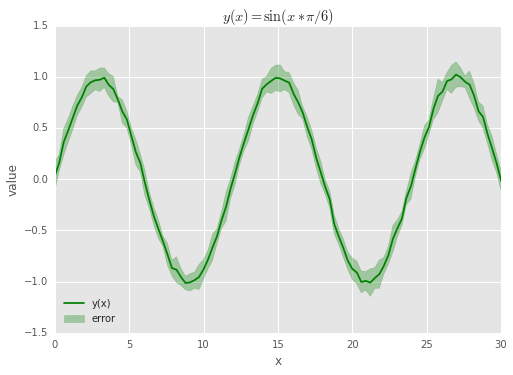

In [28]:
ax = errorfill(x, y, error, color='Green')
ax.set_title(r'$y(x) = \mathrm{sin}(x * \pi /6)$')
ax.set_xlabel('x')
ax.set_ylabel('value')

y_patch = matplotlib.lines.Line2D([], [], color='green', label='y(x)')
error_patch = matplotlib.patches.Patch(color='green', alpha=0.3, label='error')
plt.legend(loc=3, handles=[y_patch, error_patch])

**2. (1 балл)** Отобразите гистограмму распределения возрастов для каждого класса пассажиров (здесь нужно использовать данные из заданий по pandas). В результате вы должны получить три гистограммы, которые необходимо отобразить рядом друг с другом используя функцию plt.subplots. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры figsize, sharey, sharex функции plt.subplots. Также полезными могут оказаться параметры bins, normed функции plt.hist.

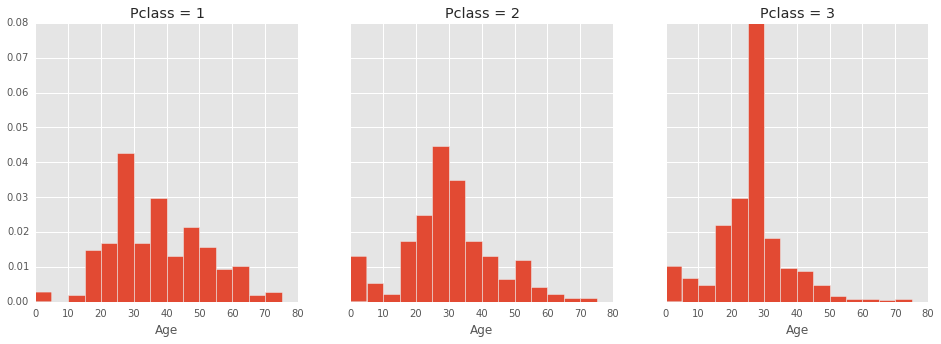

In [29]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 5), sharey=True)

bins=xrange(0, 80, 5)
for _class in dt.Pclass.unique():
    data = dt[(dt.Pclass == _class) & ~(dt.Age.isnull())].Age
    ax = axes[_class - 1]
    ax.hist(data.get_values(), bins=bins, normed=1, histtype='bar')
    ax.set_title('Pclass = ' + str(_class))
    ax.set_xlabel('Age')

plt.show()

##### или так

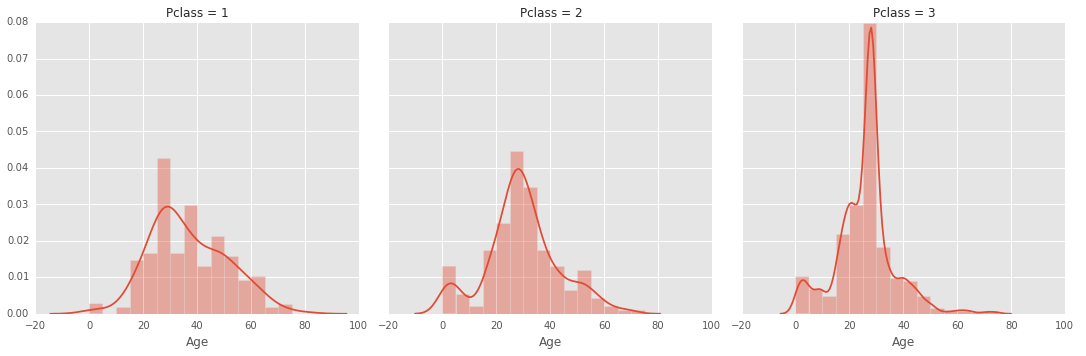

In [30]:
g = sns.FacetGrid(dt, col='Pclass', size=5);
g.map(sns.distplot, 'Age', norm_hist=True, bins=xrange(0, 80, 5));
g.add_legend()